## Semillero de Programación en Ciencias Sociales (Sesión 10)
### Felipe Botero, Laura Cely, Wilson Forero, Juan Carlos Rodríguez-Raga

#### El objetivo de esta clase es aprender a extraer datos de Twitter por medio de su API gratuita 

In [1]:
#!pip install tweepy

### Paquetes que vamos a utilizar:

**[1.Tweepy](http://tweepy.readthedocs.org):** Es un wrapper de la API de Twitter para Python. Facilita el acceso a los datos de esta plataforma.

In [3]:
import tweepy

### Conectarse con la API de Twitter para extraer datos desde Python
#### 1. Vamos a guardar las credenciales de nuestra APP como variables tipo string 

In [1]:
####input your credentials here
APP_KEY3 = '8Q1yuwTUefURfBCrz5FqdgUzA'
APP_SECRET3 = 'JT8vmohxcbuDp7SzC6Ie86jPKoozlZ7j49gK8ScpFAfNGxcG8A'
OAUTH_TOKEN3 = '119386763-XmvKPX5t59nHsRcZloLzb30RgUPF33kt9wkrSC1V'
OAUTH_TOKEN_SECRET3 ='AA9jksEfWB0K3vXxUN5beYjGcPhJphjKuOGIbeClWqFkw'

#### 2. Vamos a conectarnos con la API de Twitter con las credenciales de nuestra APP
La API impone límites a cuántos datos se les puede pedir por cada 15 minutos. Por eso, ajustamos los parámetros para que la API espere unos minutos si nos pasamos de esos límites. Más información sobre los límites [aquí](https://developer.twitter.com/en/docs/basics/rate-limits)

In [4]:
auth = tweepy.OAuthHandler(APP_KEY3, APP_SECRET3)
auth.set_access_token(OAUTH_TOKEN3, OAUTH_TOKEN_SECRET3)

api3 = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

### La API Standard Search:

Con una APP gratuita podemos conectarnos a dos APIS: Standard Search y Standard Stream. La pimera sirve para descargar datos "históricos" (Hasta una semana antes del momento en que extraemos los datos). La segunda permite extraer datos en tiempo real. Hoy vamos a trabajar con la [Api Standard Search](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets) para extraer tuits que usan alguna palabra clave o que han sido producidos por algún usuario de interés.

**IMPORTANTE:** Twitter no entrega todos los tuits que contienen una palabra clave y no da información sobre cómo selecciona cuáles otorgar. Su objetivo,dicen, no es dar información exhaustiva, pero sí relevante, por lo que seleccionan tuits que fueron populares con un número "significativo" de los tuits producidos así no hayan sido populares.

### Pasos para descargar información de una palabra clave
#### Casos de uso: ¿Cómo se habla de un tema o un usuario?

Este proceso emula la búsqueda en Twitter y realiza búsquedas automatizadas.

1. Crear un "query" con las palabras claves que vamos a buscar. Las mejores prácticas para construir queries las encuentran [acá](https://developer.twitter.com/en/docs/tweets/search/guides/standard-operators).

2. Definir si queremos fijar algún otro parámetro como lenguaje, geolocalización, fecha, etc.

3. Fijar el modo de Tweet en "extendend"

4. Fijar el parámetro Count (cuántos resultados por página intenta recibir)

5. La búsqueda con estos parámetros se anida dentro de un objeto tipo Cursor que pagina los rusultados  

6. Fijar el parámetro items de cuántas páginas consultar.

Los Tuits se almacenan en una lista a medida que se van extrayendo.

In [9]:
tweets=[]
for tweet in tweepy.Cursor(api3.search,q="Epa Colombia OR EpaColombia",count=100,
                           lang="es",tweet_mode='extended',since="2021-09-05").items(1000):
    
    tweets.append(tweet)

In [18]:
len(tweets)

1000

Cada tuit tiene un atributo ._json que contiene la información del tuit en formato [json](https://es.wikipedia.org/wiki/JSON). Este formato funciona como un diccionario de Python.

In [19]:
tweets_json=[]
for i in range(0,len(tweets)):
    tweets_json.append(tweets[i]._json)

In [20]:
tweets_json2=[tweets[i]._json for i in range(0,len(tweets))]

In [21]:
len(tweets_json)

1000

In [22]:
tweets_json[1].keys()


dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [23]:
tweets_json[1]["created_at"]

'Mon Sep 06 17:02:36 +0000 2021'

In [24]:
tweets_json[1]["retweeted_status"]

{'created_at': 'Mon Sep 06 16:58:46 +0000 2021',
 'id': 1434924043233333259,
 'id_str': '1434924043233333259',
 'full_text': '.@GustavoBolivar, en vez de preocuparse por cumplir con sus compromisos tributarios y personales, prefiere hacer fake porque una Colombiana promedio se entrevistó con el expresidente @AlvaroUribeVel.',
 'truncated': False,
 'display_text_range': [0, 199],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'GustavoBolivar',
    'name': 'Gustavo Bolívar',
    'id': 50981729,
    'id_str': '50981729',
    'indices': [1, 16]},
   {'screen_name': 'AlvaroUribeVel',
    'name': 'Álvaro Uribe Vélez',
    'id': 61097151,
    'id_str': '61097151',
    'indices': [183, 198]}],
  'urls': []},
 'metadata': {'iso_language_code': 'es', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_i

In [16]:
tweets_json[1]["retweeted_status"]["created_at"]

'Mon Sep 06 01:05:32 +0000 2021'

In [17]:
tweets=[]
for tweet in tweepy.Cursor(api3.search,q="@AlvaroUribeVel",count=100,
                           lang="es",tweet_mode='extended',since="2021-09-05").items(1000):
    
    tweets.append(tweet)

### Pasos para descargar información de un usuario
#### Casos de uso: ¿Cómo habla un usuario particular?

1. Obtener el screen name o user_id del usuario
2. Usar el método [user_timeline]

In [25]:
tweets_user=[]
screen_name="PalomaValenciaL"
#user_id=""
try:
    tweets_user=api3.user_timeline(id=screen_name,tweet_mode='extended', count=200)
except Exception as e:
    print(e, id)



In [26]:
len(tweets_user)

200

In [27]:
tweets_user=[tweets_user[i]._json for i in range(0,len(tweets_user))]

In [31]:
tweets_user[0]

{'created_at': 'Sun Sep 05 18:43:41 +0000 2021',
 'id': 1434588059601866759,
 'id_str': '1434588059601866759',
 'full_text': 'RT @PalomaValenciaL: El debate de Odebrecht\n\nMi columna \n\nhttps://t.co/156muh5YYy https://t.co/iFWQhBFx7U',
 'truncated': False,
 'display_text_range': [0, 105],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'PalomaValenciaL',
    'name': 'Paloma Valencia L',
    'id': 149281495,
    'id_str': '149281495',
    'indices': [3, 19]}],
  'urls': [{'url': 'https://t.co/156muh5YYy',
    'expanded_url': 'https://www.google.com.co/amp/s/www.kienyke.com/kien-opina/el-debate-de-odebrecht-por-paloma-valencia%3famp',
    'display_url': 'google.com.co/amp/s/www.kien…',
    'indices': [58, 81]}],
  'media': [{'id': 1434547738138583042,
    'id_str': '1434547738138583042',
    'indices': [82, 105],
    'media_url': 'http://pbs.twimg.com/media/E-iJkTkXIAIzpRY.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/E-iJkTkXIAIzpRY.jpg',

### Pasos para descargar amigos de un usuario

1. Usar los métodos friends_ids o followers_ids
2. Anidarlos dentro del método Cursor para que haga el proceso hasta llegar al final de la lista de amigos

In [56]:
usuario= "@fboteroj"
#usuario="@FERVELEZv"
following=[]
followers=[]

try:
    for page in tweepy.Cursor(api3.friends_ids, id= usuario).pages():
        following.extend(page)
        
    for page in tweepy.Cursor(api3.followers_ids, id= usuario).pages():
        followers.extend(page)

except Exception as e:
    print(e)
    next



In [58]:
len(followers)

3273

In [59]:
followers[1]

1202355192328544258

### Pasos para descargar información de un usuario

1. Usar los métodos get_user

In [62]:
user_info={}
try:
    user_info[followers[1]]=api3.get_user(id= followers[1])._json
except Exception as e:
    print(e, id)



In [64]:
user_info[followers[1]]

{'id': 1202355192328544258,
 'id_str': '1202355192328544258',
 'name': 'MariaAlejandra',
 'screen_name': 'marialejate',
 'location': 'Bogotá, D.C., Colombia',
 'profile_location': None,
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 46,
 'friends_count': 626,
 'listed_count': 0,
 'created_at': 'Wed Dec 04 22:33:25 +0000 2019',
 'favourites_count': 1760,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 188,
 'lang': None,
 'status': {'created_at': 'Mon Apr 27 18:05:20 +0000 2020',
  'id': 1254834029276336129,
  'id_str': '1254834029276336129',
  'text': '@DianaUribefm Bella !',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'DianaUribefm',
     'name': 'DianaUribe.fm',
     'id': 321094958,
     'id_str': '321094958',
     'indices': [0, 13]}],
   'urls': []},
  'source': '<a href="http://twitter.com/do

### ¿Cómo usar toda esta información?
#### Mapa

In [32]:
coordinates=[tweets_json[i]["coordinates"]for i in range (0, len(tweets_json)) if tweets_json[i]["coordinates"]!= None]

In [33]:
longitud=[coordinates[i]["coordinates"][0] for i in range (0, len(coordinates))]
latitud=[coordinates[i]["coordinates"][1] for i in range (0, len(coordinates))]

In [34]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [72]:
geometry = [Point(xy) for xy in zip(longitud, latitud)]

In [73]:
geo_df = gpd.GeoDataFrame(
geometry = geometry)

In [74]:
geo_df

,geometry
0,POINT (-74.05962 4.64993)


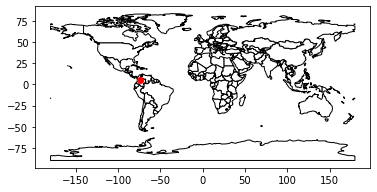

In [77]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
geo_df.plot(ax=ax, color='red')

plt.show()

#### Timeline


In [106]:
import pandas as pd
from datetime import datetime, timedelta
import altair as alt
#timeline.
creation_dates=[tweet["created_at"] for tweet in tweets_json]

df = pd.DataFrame({'dates':creation_dates})
df.dates = df.dates.astype("datetime64")+ timedelta(hours=-5)
df['just_time'] = df['dates'].dt.hour

counts= df.groupby(["just_time"]).size()
counts=counts.to_frame(name = 'count').reset_index()
counts.just_time=pd.to_datetime(counts.just_time,format='%H').dt.hour

counts.sort_values(by=['just_time'])

alt.Chart(counts).mark_line(point=True).encode(
    x='just_time',
    y='count'
).properties(
    title='Línea de tiempo'
)

alt.Chart(...)

In [110]:
counts

,just_time,count
0,5,143
1,6,144
2,7,254
3,8,190
4,9,575
5,10,659
6,11,1269
7,12,1390
8,13,1061


### Cómo guardar la información extraída

In [108]:
import pickle
f = open("./tweets_clase10.pkl","wb")
pickle.dump(tweets_json,f)
f.close()

In [109]:
tweets_leidos=pickle.load(open("./tweets_clase10.pkl", "rb"))

### Challenge: 
1. Descargar todos los seguidores y seguidos de dos usuarios de su interés (Idea: Petro y Uribe).
2. Descargar los últimos 20 tuits de los primeros 20 seguidores y seguidos extraídos en el punto anterior (hacerlo con un for y almacenando la información en un diccionario que tenga el Id de los usuarios como llave).
3. Crear dos nubes de palabras de manera que se pueda identificar las palabras más usadas por los seguidores y seguidos de los dos usuarios iniciales.
